In this notebook, the task is to accurately identify 10 different type of animal images . There are 26K images , but due to memory restrictions while using Kaggle platform, only 1000 images are considered for training , 300 images for validation and 200 images for testing.
The images are read in grayscale.  
Model building using CNN + Max Pooling layers is done.  4 layers to 8 layers models are built and tested for their performance.
Model metrics is overall accuracy and F1 score of individual class.
This is the first slice of images into train , validation and test set images.


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import os

In [2]:

train_dir = '../input/animals10/raw-img'


In [3]:
LABELS = os.listdir(train_dir)
LABELS.sort()
LABELS

['cane',
 'cavallo',
 'elefante',
 'farfalla',
 'gallina',
 'gatto',
 'mucca',
 'pecora',
 'ragno',
 'scoiattolo']

In [4]:
## map the labels to numeric values 

names = {LABELS[0] : 0 ,LABELS[1]: 1 , LABELS[2] : 2  , LABELS[3] : 3 , LABELS[4] : 4 , LABELS[5] : 5, LABELS[6] : 6, LABELS[7] : 7 , LABELS[8] : 8 , LABELS[9] : 9}

In [5]:
names

{'cane': 0,
 'cavallo': 1,
 'elefante': 2,
 'farfalla': 3,
 'gallina': 4,
 'gatto': 5,
 'mucca': 6,
 'pecora': 7,
 'ragno': 8,
 'scoiattolo': 9}

In [6]:
import cv2
import os

def load_images_from_folder(path, dirs):
    images = []
    img_class = []
    
    for c in dirs: ## for each class directory , read in the images and store 
        
        file_path = os.path.join(path, c)
        
        for file in os.listdir(file_path):
        
            img_class.append(c)
            img = cv2.imread(os.path.join(file_path,file), 0) ## for grayscale 
            img = cv2.resize(img , (224,224))
            if img is not None:
                images.append(img)
                
    return images, img_class

images , image_class = load_images_from_folder("../input/animals10/raw-img", LABELS)

In [7]:
len(images) , len(image_class)

(26179, 26179)

In [8]:
type(images) , type(image_class)

(list, list)

In [9]:
images = np.array(images)
images.shape

(26179, 224, 224)

In [25]:
images = images.reshape(images.shape[0] , 224, 224, 1)
images.shape

(26179, 224, 224, 1)

In [10]:
## convert the character class names to numeric values 
image_class_numeric = [names[i] for i in image_class]
pd.Series(image_class_numeric).value_counts()

0    4863
8    4821
4    3098
1    2623
3    2112
6    1866
9    1862
7    1820
5    1668
2    1446
dtype: int64

In [11]:
image_class_numeric = np.array(image_class_numeric)
image_class_numeric.shape

(26179,)

In [26]:
## Using sklearn train_test_split 
train, x_val_test, y_train, y_val_test = train_test_split(images, image_class_numeric , stratify = image_class_numeric, test_size = 0.25 , random_state = 12)
val, test, y_val, y_test = train_test_split(x_val_test, y_val_test , stratify = y_val_test, test_size = 0.4)

print("train size :{}".format(train.shape))
print("y_train size :{}".format(y_train.shape))
##
print("val size :{}".format(val.shape))
print("y_val size :{}".format(y_val.shape))
##
print("test size :{}".format(test.shape))
print("y_test size :{}".format(y_test.shape))

train size :(19634, 224, 224, 1)
y_train size :(19634,)
val size :(3927, 224, 224, 1)
y_val size :(3927,)
test size :(2618, 224, 224, 1)
y_test size :(2618,)


In [27]:
train = train[:1000]
y_train = y_train[:1000]

In [28]:
## number of classes in train data 
pd.Series(y_train).value_counts()

8    188
0    176
1    110
4    106
5     82
6     78
3     78
9     68
7     61
2     53
dtype: int64

In [29]:
val = val[:300]
y_val = y_val[:300]

In [30]:
## no of classes in validation data 
pd.Series(y_val).value_counts()

0    65
8    56
4    38
1    27
9    25
7    21
5    19
3    18
2    17
6    14
dtype: int64

In [31]:
test = test[:200]
y_test = y_test[:200]

In [32]:
## no of classes in test data 
pd.Series(y_test).value_counts()

0    42
8    36
1    27
4    26
3    14
7    14
2    13
9    12
6     9
5     7
dtype: int64

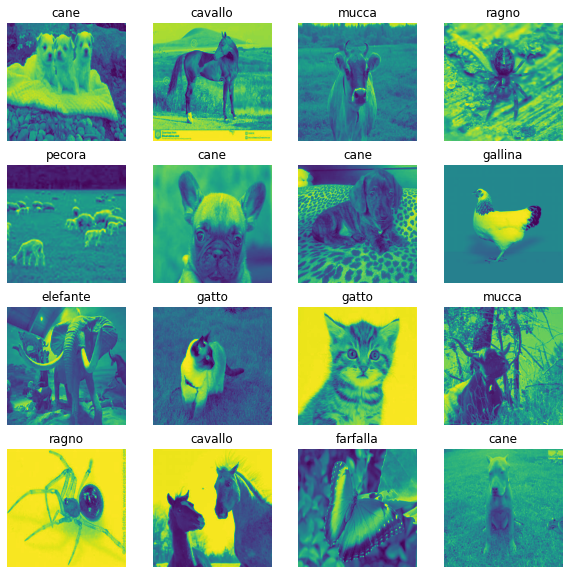

In [33]:
## visualize train set images

plt.figure(figsize=(10, 10))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    ## in order for the image to be displayed in its real color 
    rgb = cv2.cvtColor(train[i], cv2.COLOR_BGR2RGB)
    #plt.imshow(rgb, cmap = plt.cm.Spectral)
    plt.imshow(train[i])
    #
    label = y_train[i]
    name = LABELS[label]
    plt.title(name)
    plt.axis("off")

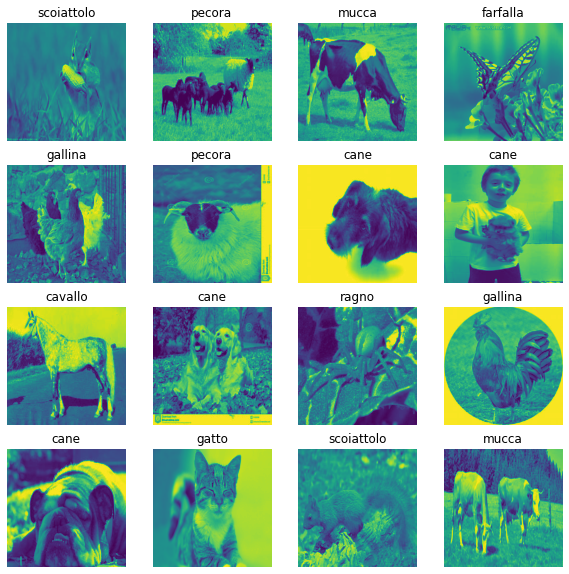

In [34]:
## visualize validation set images

plt.figure(figsize=(10, 10))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    ## in order for the image to be displayed in its real color 
    rgb = cv2.cvtColor(val[i], cv2.COLOR_BGR2RGB)
    #plt.imshow(rgb, cmap = plt.cm.Spectral)
    plt.imshow(val[i])
    #
    label = y_val[i]
    name = LABELS[label] ## name of the animal class
    plt.title(name)
    plt.axis("off")


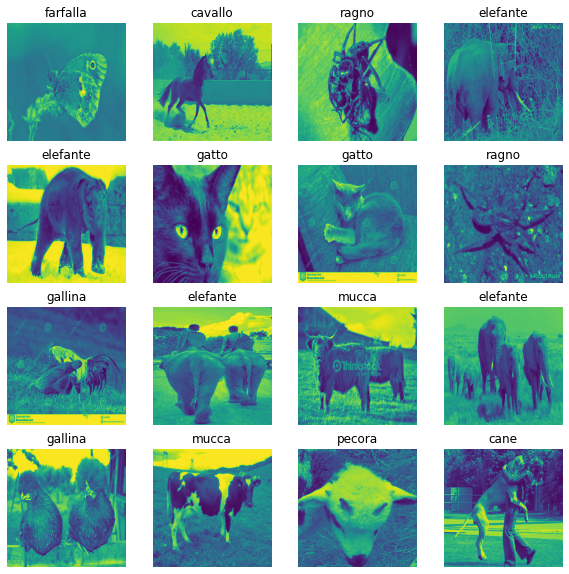

In [35]:
## visualize test set images

plt.figure(figsize=(10, 10))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    ## in order for the image to be displayed in its real color 
    rgb = cv2.cvtColor(test[i], cv2.COLOR_BGR2RGB)
    #plt.imshow(rgb, cmap = plt.cm.Spectral)
    plt.imshow(test[i])
    #
    label = y_test[i]
    name = LABELS[label]
    plt.title(name)
    plt.axis("off")

2022-01-31 07:27:18.984640: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


CPU times: user 12.4 s, sys: 1.85 s, total: 14.2 s
Wall time: 41.5 s
32/32 [==============================] - 0s 5ms/step - loss: 5.1677e-05 - accuracy: 1.0000
Train image accuracy :1.0
7/7 [==============================] - 0s 5ms/step - loss: 6.7612 - accuracy: 0.3600
Test image accuracy :0.36000001430511475
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 224, 224, 1)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 224, 224, 8)       80        
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 112, 112, 8)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 112, 112, 16)      1168      
_________________________________________________________________
max_po

2022-01-31 07:28:00.123978: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


              precision    recall  f1-score   support

        cane       0.49      0.45      0.47        42
     cavallo       0.38      0.52      0.44        27
    elefante       0.17      0.08      0.11        13
    farfalla       0.36      0.36      0.36        14
     gallina       0.44      0.31      0.36        26
       gatto       0.00      0.00      0.00         7
       mucca       0.21      0.44      0.29         9
      pecora       0.09      0.07      0.08        14
       ragno       0.63      0.47      0.54        36
  scoiattolo       0.17      0.25      0.20        12

    accuracy                           0.36       200
   macro avg       0.29      0.30      0.28       200
weighted avg       0.39      0.36      0.36       200



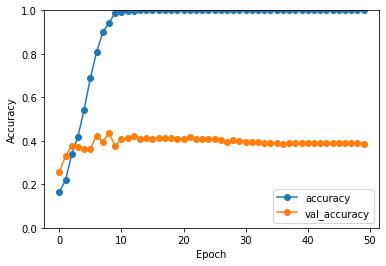

In [36]:
## 4 layer CNN 

model = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(224, 224, 1),padding = 'same', filters = 8, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 16, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 32, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 64, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    #tf.keras.layers.BatchNormalization(),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512, activation=tf.nn.relu),
tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


model.compile(optimizer= tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'], )
%time history = model.fit(train ,y_train , epochs=50, validation_data = (val ,y_val ), verbose = 0)
##
train_loss, train_acc = model.evaluate(train, y_train)
print("Train image accuracy :{}".format(train_acc))
test_loss, test_acc = model.evaluate(test , y_test)
print("Test image accuracy :{}".format(test_acc))
##
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
##
print(model.summary())

model.save('cnn_4')
##
test_predicted = model.predict(test)
##
predicted_label = []
for i in test_predicted:
    label =  np.argmax(i, axis = -1)
    predicted_label.append(label)
    
## classification report 
print(classification_report(y_test, predicted_label, target_names = LABELS))

Model is overfitting

CPU times: user 11.5 s, sys: 958 ms, total: 12.5 s
Wall time: 18 s
32/32 [==============================] - 0s 4ms/step - loss: 5.7904e-05 - accuracy: 1.0000
Train image accuracy :1.0
7/7 [==============================] - 0s 4ms/step - loss: 6.6490 - accuracy: 0.3350
Test image accuracy :0.33500000834465027
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 224, 224, 8)       80        
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 112, 112, 8)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 112, 112, 16)      1168      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 56, 56, 16)        0         
_________________________________________________________________
conv2d_1

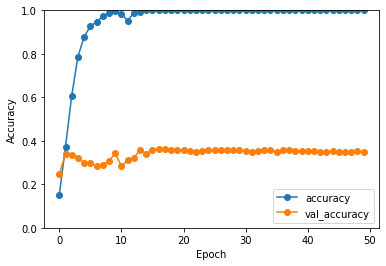

In [37]:
## 4 layer CNN 

model = tf.keras.models.Sequential([
    #tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(224, 224, 1),padding = 'same', filters = 8, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 16, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 32, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 64, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    #tf.keras.layers.BatchNormalization(),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512, activation=tf.nn.relu),
tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


model.compile(optimizer= tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'], )
%time history = model.fit(train ,y_train , epochs=50, validation_data = (val ,y_val ), verbose = 0)
##
train_loss, train_acc = model.evaluate(train, y_train)
print("Train image accuracy :{}".format(train_acc))
test_loss, test_acc = model.evaluate(test , y_test)
print("Test image accuracy :{}".format(test_acc))
##
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
##
print(model.summary())

model.save('cnn_4')
##
test_predicted = model.predict(test)
##
predicted_label = []
for i in test_predicted:
    label =  np.argmax(i, axis = -1)
    predicted_label.append(label)
    
## classification report 
print(classification_report(y_test, predicted_label, target_names = LABELS))

CPU times: user 12.1 s, sys: 896 ms, total: 13 s
Wall time: 18.7 s
32/32 [==============================] - 0s 5ms/step - loss: 2.4189e-05 - accuracy: 1.0000
Train image accuracy :1.0
7/7 [==============================] - 0s 9ms/step - loss: 6.8483 - accuracy: 0.4150
Test image accuracy :0.41499999165534973
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 224, 224, 1)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 224, 224, 8)       80        
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 112, 112, 8)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 112, 112, 16)      1168      
_________________________________________________________________
max_pool

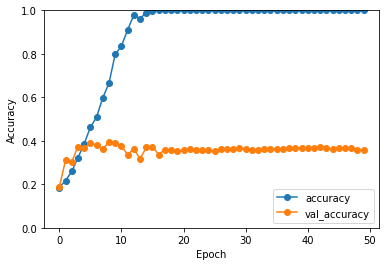

In [38]:
## 5 layer CNN 

model = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(224, 224, 1),padding = 'same', filters = 8, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 16, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 32, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 64, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 128, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    #tf.keras.layers.BatchNormalization(),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512, activation=tf.nn.relu),
tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


model.compile(optimizer= tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'], )
%time history = model.fit(train ,y_train , epochs=50, validation_data = (val ,y_val ), verbose = 0)
##
train_loss, train_acc = model.evaluate(train, y_train)
print("Train image accuracy :{}".format(train_acc))
test_loss, test_acc = model.evaluate(test , y_test)
print("Test image accuracy :{}".format(test_acc))
##
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
##
print(model.summary())

model.save('cnn_4')
##
test_predicted = model.predict(test)
##
predicted_label = []
for i in test_predicted:
    label =  np.argmax(i, axis = -1)
    predicted_label.append(label)
    
## classification report 
print(classification_report(y_test, predicted_label, target_names = LABELS))

CPU times: user 12.7 s, sys: 925 ms, total: 13.7 s
Wall time: 19.2 s
32/32 [==============================] - 0s 5ms/step - loss: 3.5024e-05 - accuracy: 1.0000
Train image accuracy :1.0
7/7 [==============================] - 0s 4ms/step - loss: 7.4215 - accuracy: 0.3850
Test image accuracy :0.38499999046325684
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_4 (Rescaling)      (None, 224, 224, 1)       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 224, 224, 8)       80        
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 112, 112, 8)       0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 112, 112, 16)      1168      
_________________________________________________________________
max_po

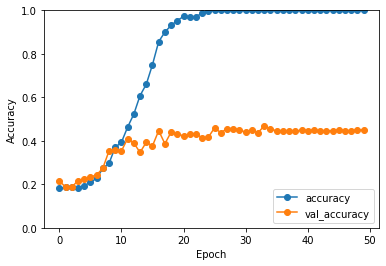

In [39]:
## 6 layer CNN 

model = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(224, 224, 1),padding = 'same', filters = 8, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 16, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 32, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 64, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 128, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
     tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 256, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    #tf.keras.layers.BatchNormalization(),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512, activation=tf.nn.relu),
tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


model.compile(optimizer= tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'], )
%time history = model.fit(train ,y_train , epochs=50, validation_data = (val ,y_val ), verbose = 0)
##
train_loss, train_acc = model.evaluate(train, y_train)
print("Train image accuracy :{}".format(train_acc))
test_loss, test_acc = model.evaluate(test , y_test)
print("Test image accuracy :{}".format(test_acc))
##
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
##
print(model.summary())

model.save('cnn_6')
##
test_predicted = model.predict(test)
##
predicted_label = []
for i in test_predicted:
    label =  np.argmax(i, axis = -1)
    predicted_label.append(label)
    
## classification report 
print(classification_report(y_test, predicted_label, target_names = LABELS))

CPU times: user 13.9 s, sys: 953 ms, total: 14.8 s
Wall time: 41.5 s
32/32 [==============================] - 0s 5ms/step - loss: 1.0089e-05 - accuracy: 1.0000
Train image accuracy :1.0
7/7 [==============================] - 0s 5ms/step - loss: 10.4332 - accuracy: 0.3350
Test image accuracy :0.33500000834465027
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_5 (Rescaling)      (None, 224, 224, 1)       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 224, 224, 8)       80        
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 112, 112, 8)       0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 112, 112, 16)      1168      
_________________________________________________________________
conv2

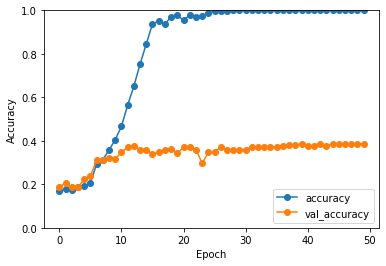

In [40]:
## 7 layer CNN 

model = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(224, 224, 1),padding = 'same', filters = 8, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 16, kernel_size = 3),
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 16, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 32, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 64, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 128, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
     tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 256, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    #tf.keras.layers.BatchNormalization(),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512, activation=tf.nn.relu),
tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


model.compile(optimizer= tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'], )
%time history = model.fit(train ,y_train , epochs=50, validation_data = (val ,y_val ), verbose = 0)
##
train_loss, train_acc = model.evaluate(train, y_train)
print("Train image accuracy :{}".format(train_acc))
test_loss, test_acc = model.evaluate(test , y_test)
print("Test image accuracy :{}".format(test_acc))
##
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
##
print(model.summary())

model.save('cnn_7')
##
test_predicted = model.predict(test)
##
predicted_label = []
for i in test_predicted:
    label =  np.argmax(i, axis = -1)
    predicted_label.append(label)
    
## classification report 
print(classification_report(y_test, predicted_label, target_names = LABELS))

CPU times: user 13.7 s, sys: 892 ms, total: 14.5 s
Wall time: 21.1 s
32/32 [==============================] - 0s 5ms/step - loss: 1.6271e-04 - accuracy: 1.0000
Train image accuracy :1.0
7/7 [==============================] - 0s 5ms/step - loss: 10.5562 - accuracy: 0.2600
Test image accuracy :0.25999999046325684
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_6 (Rescaling)      (None, 224, 224, 1)       0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 224, 224, 8)       80        
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 112, 112, 8)       0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 112, 112, 16)      1168      
_________________________________________________________________
conv2

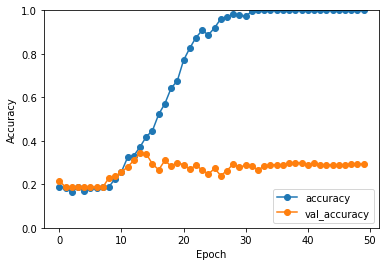

In [41]:
## 7 layer CNN - less filters 

model = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(224, 224, 1),padding = 'same', filters = 8, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 16, kernel_size = 3),
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 16, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 16, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 16, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 16, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
     tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 16, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    #tf.keras.layers.BatchNormalization(),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512, activation=tf.nn.relu),
tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


model.compile(optimizer= tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'], )
%time history = model.fit(train ,y_train , epochs=50, validation_data = (val ,y_val ), verbose = 0)
##
train_loss, train_acc = model.evaluate(train, y_train)
print("Train image accuracy :{}".format(train_acc))
test_loss, test_acc = model.evaluate(test , y_test)
print("Test image accuracy :{}".format(test_acc))
##
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
##
print(model.summary())

model.save('cnn_7')
##
test_predicted = model.predict(test)
##
predicted_label = []
for i in test_predicted:
    label =  np.argmax(i, axis = -1)
    predicted_label.append(label)
    
## classification report 
print(classification_report(y_test, predicted_label, target_names = LABELS))

CPU times: user 13.5 s, sys: 917 ms, total: 14.4 s
Wall time: 22.8 s
32/32 [==============================] - 0s 5ms/step - loss: 2.0808 - accuracy: 0.2750
Train image accuracy :0.2750000059604645
7/7 [==============================] - 0s 5ms/step - loss: 2.1093 - accuracy: 0.2550
Test image accuracy :0.2549999952316284
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_7 (Rescaling)      (None, 224, 224, 1)       0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 224, 224, 8)       80        
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 112, 112, 8)       0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 112, 112, 16)      1168      
______________________________________________________________

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


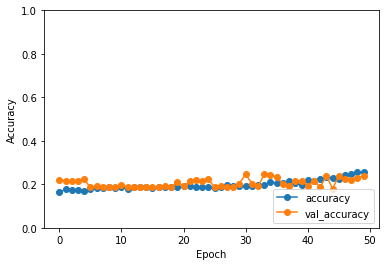

In [42]:
## 7 layer CNN - SGD optimizer
 
model = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(224, 224, 1),padding = 'same', filters = 8, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 16, kernel_size = 3),
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 16, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 32, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 64, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 128, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
     tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 256, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    #tf.keras.layers.BatchNormalization(),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512, activation=tf.nn.relu),
tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


model.compile(optimizer= tf.keras.optimizers.SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'], )
%time history = model.fit(train ,y_train , epochs=50, validation_data = (val ,y_val ), verbose = 0)
##
train_loss, train_acc = model.evaluate(train, y_train)
print("Train image accuracy :{}".format(train_acc))
test_loss, test_acc = model.evaluate(test , y_test)
print("Test image accuracy :{}".format(test_acc))
##
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
##
print(model.summary())

model.save('cnn_7')
##
test_predicted = model.predict(test)
##
predicted_label = []
for i in test_predicted:
    label =  np.argmax(i, axis = -1)
    predicted_label.append(label)
    
## classification report 
print(classification_report(y_test, predicted_label, target_names = LABELS))

SGD Optimizer does not perform better than Adam though the learning in training is slow.

CPU times: user 14.6 s, sys: 935 ms, total: 15.6 s
Wall time: 24.9 s
32/32 [==============================] - 0s 5ms/step - loss: 3.8760e-05 - accuracy: 1.0000
Train image accuracy :1.0
7/7 [==============================] - 0s 5ms/step - loss: 10.3778 - accuracy: 0.2850
Test image accuracy :0.2849999964237213
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_8 (Rescaling)      (None, 224, 224, 1)       0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 224, 224, 8)       80        
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 112, 112, 8)       0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 112, 112, 16)      1168      
_________________________________________________________________
conv2d

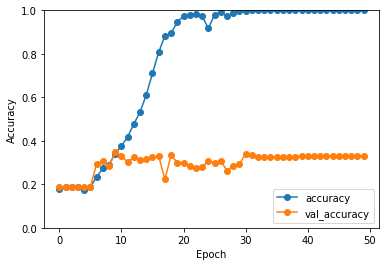

In [43]:
## 8 layer CNN 
 
model = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(224, 224, 1),padding = 'same', filters = 8, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 16, kernel_size = 3),
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 16, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 32, kernel_size = 3),
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 32, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 64, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 128, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
     tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 256, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    #tf.keras.layers.BatchNormalization(),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512, activation=tf.nn.relu),
tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


model.compile(optimizer= tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'], )
%time history = model.fit(train ,y_train , epochs=50, validation_data = (val ,y_val ), verbose = 0)
##
train_loss, train_acc = model.evaluate(train, y_train)
print("Train image accuracy :{}".format(train_acc))
test_loss, test_acc = model.evaluate(test , y_test)
print("Test image accuracy :{}".format(test_acc))
##
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
##
print(model.summary())

model.save('cnn_8')
##
test_predicted = model.predict(test)
##
predicted_label = []
for i in test_predicted:
    label =  np.argmax(i, axis = -1)
    predicted_label.append(label)
    
## classification report 
print(classification_report(y_test, predicted_label, target_names = LABELS))

CPU times: user 12.4 s, sys: 912 ms, total: 13.3 s
Wall time: 18.5 s
32/32 [==============================] - 0s 5ms/step - loss: 2.1104e-05 - accuracy: 1.0000
Train image accuracy :1.0
7/7 [==============================] - 0s 4ms/step - loss: 7.0137 - accuracy: 0.3850
Test image accuracy :0.38499999046325684
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_9 (Rescaling)      (None, 224, 224, 1)       0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 224, 224, 8)       80        
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 112, 112, 8)       0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 112, 112, 16)      1168      
_________________________________________________________________
max_p

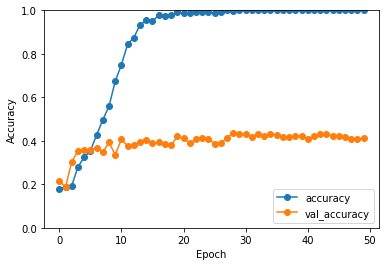

In [44]:
## 5 layer CNN  with dropout 

model = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(224, 224, 1),padding = 'same', filters = 8, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 16, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 32, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 64, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 128, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Dropout(0.2),
    #tf.keras.layers.BatchNormalization(),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512, activation=tf.nn.relu),
tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


model.compile(optimizer= tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'], )
%time history = model.fit(train ,y_train , epochs=50, validation_data = (val ,y_val ), verbose = 0)
##
train_loss, train_acc = model.evaluate(train, y_train)
print("Train image accuracy :{}".format(train_acc))
test_loss, test_acc = model.evaluate(test , y_test)
print("Test image accuracy :{}".format(test_acc))
##
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
##
print(model.summary())

model.save('cnn_5')
##
test_predicted = model.predict(test)
##
predicted_label = []
for i in test_predicted:
    label =  np.argmax(i, axis = -1)
    predicted_label.append(label)
    
## classification report 
print(classification_report(y_test, predicted_label, target_names = LABELS))

CPU times: user 10.3 s, sys: 941 ms, total: 11.2 s
Wall time: 19.1 s
32/32 [==============================] - 0s 4ms/step - loss: 4.3858e-04 - accuracy: 1.0000
Train image accuracy :1.0
7/7 [==============================] - 0s 4ms/step - loss: 3.8889 - accuracy: 0.3200
Test image accuracy :0.3199999928474426
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_10 (Rescaling)     (None, 224, 224, 1)       0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 224, 224, 8)       80        
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 112, 112, 8)       0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 112, 112, 16)      1168      
_________________________________________________________________
max_po

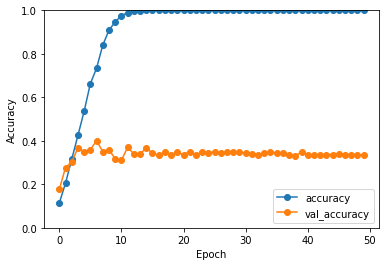

In [45]:
## 3 layer CNN  with dropout 

model = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(224, 224, 1),padding = 'same', filters = 8, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 16, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Dropout(0.2),
    #tf.keras.layers.BatchNormalization(),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512, activation=tf.nn.relu),
tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


model.compile(optimizer= tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'], )
%time history = model.fit(train ,y_train , epochs=50, validation_data = (val ,y_val ), verbose = 0)
##
train_loss, train_acc = model.evaluate(train, y_train)
print("Train image accuracy :{}".format(train_acc))
test_loss, test_acc = model.evaluate(test , y_test)
print("Test image accuracy :{}".format(test_acc))
##
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
##
print(model.summary())

model.save('cnn_2')
##
test_predicted = model.predict(test)
##
predicted_label = []
for i in test_predicted:
    label =  np.argmax(i, axis = -1)
    predicted_label.append(label)
    
## classification report 
print(classification_report(y_test, predicted_label, target_names = LABELS))

CPU times: user 3.69 s, sys: 297 ms, total: 3.99 s
Wall time: 10.7 s
32/32 [==============================] - 0s 5ms/step - loss: 0.3412 - accuracy: 0.9360
Train image accuracy :0.9359999895095825
7/7 [==============================] - 0s 5ms/step - loss: 2.5817 - accuracy: 0.2750
Test image accuracy :0.2750000059604645
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_12 (Rescaling)     (None, 224, 224, 1)       0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 224, 224, 8)       80        
_________________________________________________________________
dropout_5 (Dropout)          (None, 224, 224, 8)       0         
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 112, 112, 8)       0         
_____________________________________________________________

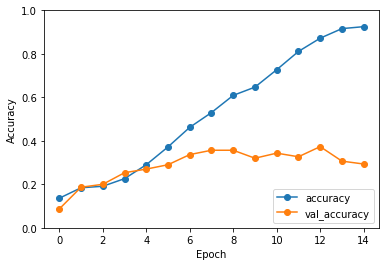

In [47]:
## 3 layer CNN  with dropouts 

model = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(224, 224, 1),padding = 'same', filters = 8, kernel_size = 3),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D( activation='relu', padding = 'same', filters = 16, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
    tf.keras.layers.Dropout(0.2),
    #tf.keras.layers.BatchNormalization(),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512, activation=tf.nn.relu),
tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


model.compile(optimizer= tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'], )
%time history = model.fit(train ,y_train , epochs = 15, validation_data = (val ,y_val ), verbose = 0)
##
train_loss, train_acc = model.evaluate(train, y_train)
print("Train image accuracy :{}".format(train_acc))
test_loss, test_acc = model.evaluate(test , y_test)
print("Test image accuracy :{}".format(test_acc))
##
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
##
print(model.summary())

model.save('cnn_3')
##
test_predicted = model.predict(test)
##
predicted_label = []
for i in test_predicted:
    label =  np.argmax(i, axis = -1)
    predicted_label.append(label)
    
## classification report 
print(classification_report(y_test, predicted_label, target_names = LABELS))

Summary :  
5 layer CNN + Max Pooling model gives an accuracy of 0.41.  